MASTERING STATISTICAL ANALYSIS IN PYTHON WITH REAL-WORLD DATASETS

LOADING THE DATASET

First, you need to load the dataset into a pandas DataFrame

In [1]:
import pandas as pd

df=pd.read_csv("Life Expectancy Data.csv")
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

PERFORMING DESCRIPTIVE STATISTICS

Calculate the mean, median, mode, standard deviation, and variance. Let’s assume we want to perform these calculations on a feature like DelayMinutes.

In [8]:
target='Life expectancy '

#basic descriptive statistics
mean = df[target].mean()
median = df[target].median()
mode = df[target].mode()[0]
std_dev = df[target].std()
variance = df[target].var()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")

Mean: 69.22493169398908
Median: 72.1
Mode: 73.0
Standard Deviation: 9.523867487824301
Variance: 90.70405192563676


In [9]:
#additional descriptive statistics
print("\nRange:\n", df[target].max() - df[target].min())
print("\nSkewness:\n", df[target].skew())
print("\nKurtosis:\n", df[target].kurt())


Range:
 52.7

Skewness:
 -0.6386047358773552

Kurtosis:
 -0.23447739417967428


PERFORMING INFERENTIAL STATISTICS

To determine if the life expectancy is significantly different from a chosen value, you can use a one-sample t-test. Here’s how you can perform the test:

In [12]:
from scipy import stats

# Specify the chosen value (e.g., 70 years)
chosen_value = 70

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(df['Life expectancy '].dropna(), chosen_value)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -4.40364367324774
P-Value: 1.1026360146400394e-05


CONFIDENCE INTERVALS

To compute a 95% confidence interval for the mean of the selected feature:

In [14]:
import numpy as np

# Confidence interval calculation
mean_life_expectancy = np.mean(df['Life expectancy '])
std_life_expectancy = np.std(df['Life expectancy '], ddof=1)
n = len(df['Life expectancy '].dropna())

# 95% confidence interval
confidence_interval = stats.t.interval(0.95, n-1, loc=mean_life_expectancy, scale=std_life_expectancy/np.sqrt(n))
print(f"95% Confidence Interval for Life Expectancy: {confidence_interval}")


95% Confidence Interval for Life Expectancy: (68.87982329969054, 69.57004008828761)


REGRESSION ANALYSIS

Check for missing values, and prepare the data for analysis

In [15]:
#Check for missing values
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [16]:
df_clean = df[['Life expectancy ', 'GDP']].dropna()

Use scikit-learn to perform linear regression

In [17]:
import statsmodels.api as sm

# Define the independent (X) and dependent (Y) variables
X = df_clean['GDP']
y = df_clean['Life expectancy ']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Display the regression model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     671.8
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          2.71e-131
Time:                        23:17:21   Log-Likelihood:                -8860.4
No. Observations:                2485   AIC:                         1.772e+04
Df Residuals:                    2483   BIC:                         1.774e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.0350      0.194    345.700      0.0

VISUALIZATION

Create visualizations to illustrate the relationships between variables and the regression line


Scatter Plot with Regression Line

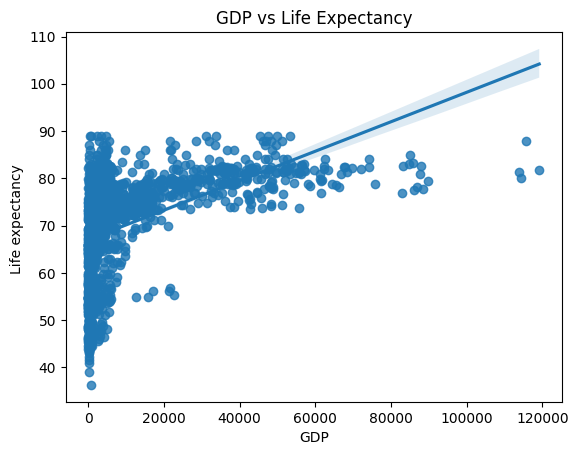

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the regression line
sns.regplot(x='GDP', y='Life expectancy ', data=df_clean)
plt.xlabel("GDP")
plt.ylabel("Life expectancy ")
plt.title('GDP vs Life Expectancy')
plt.show()
